In [66]:
# Importujeme knihovny
import pandas as pd
import mysql.connector
import csv
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict
import warnings
warnings.filterwarnings('ignore')

## Extrakce dat

In [2]:
# Adresa databáze
db_url = 'https://dsintrodb.skillbox.cc/'
# Připojení k databázi
conn = pymysql.connect(
    host='dsintrodb.skillbox.cc',
    user='student',
    password='VisionDrivesDecision',
    database='skillbox',
    port = 3307
)
# SQL-dotaz pro načtení dat tabulky Orders
query = "SELECT * FROM orders"
df = pd.read_sql(query, conn)

In [3]:
# Uložení výsledku do souboru Excel
df.to_excel('orders.xlsx', index=False)
# Ukončení připojení
conn.close()
print("Data byla úspěšně uložena do souboru Excel 'orders.xlsx'.")

Data byla úspěšně uložena do souboru Excel 'orders.xlsx'.


In [4]:
with open('orders.xlsx', 'r', encoding='utf-8', errors='replace') as file: 
    content = file.read()
with open('orders_utf8.xlsx', 'w', encoding='utf-8') as file:
    file.write(content)

In [5]:
db_url = 'https://dsintrodb.skillbox.cc/'
# Připojení k databázi
conn = pymysql.connect(
    host='dsintrodb.skillbox.cc',
    user='student',
    password='VisionDrivesDecision',
    database='skillbox',
    port = 3307
)
# SQL-dotaz pro načtení dat tabulky Orders_product
query = "SELECT * FROM orders_product"
df = pd.read_sql(query, conn)

# Uložení výsledku do souboru Excel
df.to_excel('orders_product.xlsx', index=False)
# Ukončení připojení
conn.close()

print("Data byla úspěšně uložena do souboru Excel 'orders_product.xlsx'.")

Data byla úspěšně uložena do souboru Excel 'orders_product.xlsx'.


In [6]:
db_url = 'https://dsintrodb.skillbox.cc/'
# Připojení k databázi
conn = pymysql.connect(
    host='dsintrodb.skillbox.cc',
    user='student',
    password='VisionDrivesDecision',
    database='skillbox',
    port = 3307
)
# SQL-dotaz pro načtení dat tabulky Info
query = "SELECT * FROM info"
df = pd.read_sql(query, conn)

# Uložení výsledku do souboru Excel
df.to_excel('info.xlsx', index=False)
# Ukončení připojení
conn.close()

print("Data byla úspěšně uložena do souboru Excel 'info.xlsx'.")

Data byla úspěšně uložena do souboru Excel 'info.xlsx'.


In [7]:
db_url = 'https://dsintrodb.skillbox.cc/'
# Připojení k databázi
conn = pymysql.connect(
    host='dsintrodb.skillbox.cc',
    user='student',
    password='VisionDrivesDecision',
    database='skillbox',
    port = 3307
)
# SQL-dotaz pro načtení dat tabulky App_sess
query = "SELECT * FROM app_sess"
df = pd.read_sql(query, conn)

# Uložení výsledku do souboru Excel
df.to_excel('app_sess.xlsx', index=False)
# Ukončení připojení
conn.close()

print("Data byla úspěšně uložena do souboru Excel 'app_sess.xlsx'.")

Data byla úspěšně uložena do souboru Excel 'app_sess.xlsx'.


In [8]:
db_url = 'https://dsintrodb.skillbox.cc/'
# Připojení k databázi
conn = pymysql.connect(
    host='dsintrodb.skillbox.cc',
    user='student',
    password='VisionDrivesDecision',
    database='skillbox',
    port = 3307
)
# SQL-dotaz pro načtení dat tabulky Customers
query = "SELECT * FROM products"
df = pd.read_sql(query, conn)

# Uložení výsledku do souboru Excel
df.to_excel('products.xlsx', index=False)
# Ukončení připojení
conn.close()

print("Data byla úspěšně uložena do souboru Excel 'products.xlsx'.")

Data byla úspěšně uložena do souboru Excel 'products.xlsx'.


In [9]:
df3 =  pd.read_excel('app_sess.xlsx')
df_app = df3.drop('session_id', axis=1)

In [10]:
df2 = pd.read_excel('info.xlsx')
df_info = df2.drop('delivery_id', axis=1)

In [11]:
orders_product = pd.read_excel('orders_product.xlsx')

In [12]:
df_orders = pd.read_excel('orders.xlsx')

In [13]:
products =  pd.read_excel('products.xlsx')

## Vytvoření cílové proměnné

In [14]:
# Vytvoření cílové proměnné
order_target = pd.merge(df_orders, df_info, on='order_id')
order_target

,order_id,customer_id,order_dt,payment_method,delivery_dt,is_completed_flg
0,99983,4951223,07.12.2021,offline,17-01-2022,True
1,99983,4951223,07.12.2021,offline,24-12-2021,True
2,99983,4951223,07.12.2021,offline,04-01-2022,True
3,99983,4951223,07.12.2021,offline,18-12-2021,False
4,99969,1806908,29.07.2022,offline,03-09-2022,True
...,...,...,...,...,...,...
3034,105,8042250,03.11.2021,online,23-11-2021,False
3035,97,6080668,23.04.2021,online,06-06-2021,True
3036,97,6080668,23.04.2021,online,29-05-2021,False
3037,97,6080668,23.04.2021,online,07-06-2021,True


In [15]:
# Převod řetězcové reprezentace kalendářních dat na objekty datetime 
order_target['order_dt'] = pd.to_datetime(order_target['order_dt'], format='%d.%m.%Y')

In [16]:
# Formátování dat ve formátu "DD-MM-RRRR" 
order_target['order_dt'] = order_target['order_dt'].dt.strftime('%d-%m-%Y')

In [17]:
order_target

,order_id,customer_id,order_dt,payment_method,delivery_dt,is_completed_flg
0,99983,4951223,07-12-2021,offline,17-01-2022,True
1,99983,4951223,07-12-2021,offline,24-12-2021,True
2,99983,4951223,07-12-2021,offline,04-01-2022,True
3,99983,4951223,07-12-2021,offline,18-12-2021,False
4,99969,1806908,29-07-2022,offline,03-09-2022,True
...,...,...,...,...,...,...
3034,105,8042250,03-11-2021,online,23-11-2021,False
3035,97,6080668,23-04-2021,online,06-06-2021,True
3036,97,6080668,23-04-2021,online,29-05-2021,False
3037,97,6080668,23-04-2021,online,07-06-2021,True


In [18]:
# Převod řetězcových dat na objekty datetime 
order_target['order_dt'] = pd.to_datetime(order_target['order_dt'], dayfirst=True) 
order_target['delivery_dt'] = pd.to_datetime(order_target['delivery_dt'], dayfirst=True)

In [19]:
# Vytvoření samotné cílové proměnné 
order_target['delivery_time'] = ((order_target['delivery_dt'] - order_target['order_dt']).dt.days).astype('int64').astype(int) 

In [20]:
# Z tabulky order_target ponecháme pouze order_id a cílovou proměnnou delivery_time a zbytek odstraníme
columns_for_drop = ['customer_id', 'payment_method', 'order_dt', 'delivery_dt', 'is_completed_flg']
target = order_target.drop(columns_for_drop, axis=1)
target

,order_id,delivery_time
0,99983,41
1,99983,17
2,99983,28
3,99983,11
4,99969,36
...,...,...
3034,105,20
3035,97,44
3036,97,36
3037,97,45


## Spojeni tabulek a zpracování dat

In [21]:
orders_general = pd.merge(orders_product, products, on='product_id')
orders_general

,order_id,product_id,amount,product_group_name,product_name,Price
0,52414,4,33,Одежда,Рубашка,15000
1,7695,4,21,Одежда,Рубашка,15000
2,22012,4,8,Одежда,Рубашка,15000
3,8509,4,50,Одежда,Рубашка,15000
4,82238,4,27,Одежда,Рубашка,15000
...,...,...,...,...,...,...
5985,98382,7,50,Часы,Часы настенные,3000
5986,30026,7,35,Часы,Часы настенные,3000
5987,65083,7,32,Часы,Часы настенные,3000
5988,70542,7,37,Часы,Часы настенные,3000


In [22]:
# Zobrazíme informace 
orders_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5990 entries, 0 to 5989
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            5990 non-null   int64 
 1   product_id          5990 non-null   int64 
 2   amount              5990 non-null   int64 
 3   product_group_name  5990 non-null   object
 4   product_name        5990 non-null   object
 5   Price               5990 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 280.9+ KB


In [23]:
#Zobrazime počet plně vyplněných prvků a jejich procentuální podíl z celého výběru
def print_useful_rows_info(orders_general):
    print('Počet plně vyplněných prvků z celeho vyběru:', len(orders_general.dropna()))
    print('Procento plně obsazených prvků z celého výběru:', round(len(orders_general.dropna()) / len(orders_general) * 100, 2))
    
print_useful_rows_info(orders_general)

Počet plně vyplněných prvků z celeho vyběru: 5990
Procento plně obsazených prvků z celého výběru: 100.0


###  Normalizace dat

In [24]:
# Vytvoření datového rámce pro transformaci
data = orders_general[['product_group_name', 'product_name']]
data

,product_group_name,product_name
0,Одежда,Рубашка
1,Одежда,Рубашка
2,Одежда,Рубашка
3,Одежда,Рубашка
4,Одежда,Рубашка
...,...,...
5985,Часы,Часы настенные
5986,Часы,Часы настенные
5987,Часы,Часы настенные
5988,Часы,Часы настенные


In [25]:
#Vytvořte objekt třídy OneHotEncoder, který bude zodpovědný za transformaci funkcí kategorií
ohe = OneHotEncoder(sparse_output=False)
ohe

OneHotEncoder(sparse_output=False)

In [26]:
#Identifikace transformačních parametrů v datovém rámci pomocí proměnných kategorií
ohe.fit(data)

OneHotEncoder(sparse_output=False)

In [27]:
#Použijeme transformace na datový rámec s proměnnými kategorií a uložení do nové proměnné
ohe_data = ohe.fit_transform(data)
ohe_data.shape

(5990, 19)

In [28]:
#Zobrazíme nové názvy atributů pomocí metody get_feature_names_out
new_feature = ohe.get_feature_names_out()
new_feature

array(['product_group_name_Напитки', 'product_group_name_Одежда',
       'product_group_name_Продукты', 'product_group_name_Часы',
       'product_name_Вода', 'product_name_Злой кола',
       'product_name_Круассан', 'product_name_Молоко',
       'product_name_Носки', 'product_name_Огурец',
       'product_name_Рубашка', 'product_name_Сок', 'product_name_Хлеб',
       'product_name_Часы напольные', 'product_name_Часы наручные',
       'product_name_Часы настенные', 'product_name_Часы с кукушкой',
       'product_name_Штаны', 'product_name_Юбка'], dtype=object)

In [29]:
# Přidame výsledné nové funkce do původního datového rámce
orders_general[new_feature] = ohe_data
orders_general.head()

,order_id,product_id,amount,product_group_name,product_name,Price,product_group_name_Напитки,product_group_name_Одежда,product_group_name_Продукты,product_group_name_Часы,...,product_name_Огурец,product_name_Рубашка,product_name_Сок,product_name_Хлеб,product_name_Часы напольные,product_name_Часы наручные,product_name_Часы настенные,product_name_Часы с кукушкой,product_name_Штаны,product_name_Юбка
0,52414,4,33,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7695,4,21,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22012,4,8,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8509,4,50,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82238,4,27,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Kontrola rozdělení dat

In [30]:
# Podívejme se do sloupců Amount a Price pro rozdělení dat a zvolme metodu normalizace

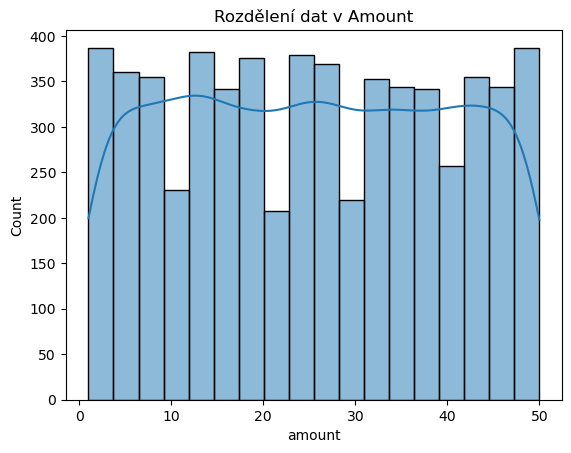

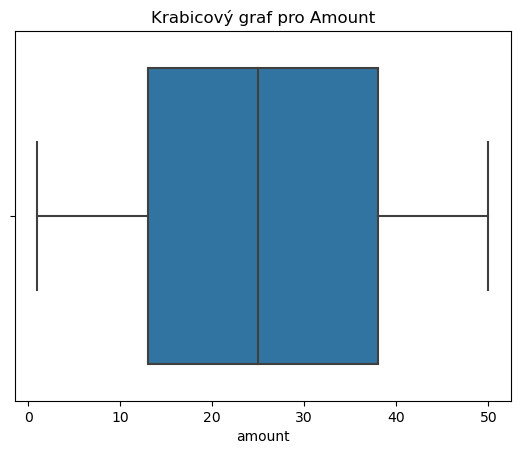

In [33]:
# Histogram
sns.histplot(orders_general['amount'], kde=True)
plt.title('Rozdělení dat v Amount')
plt.show()

# Krabicový graf
sns.boxplot(x=orders_general['amount'])
plt.title('Krabicový graf pro Amount')
plt.show()


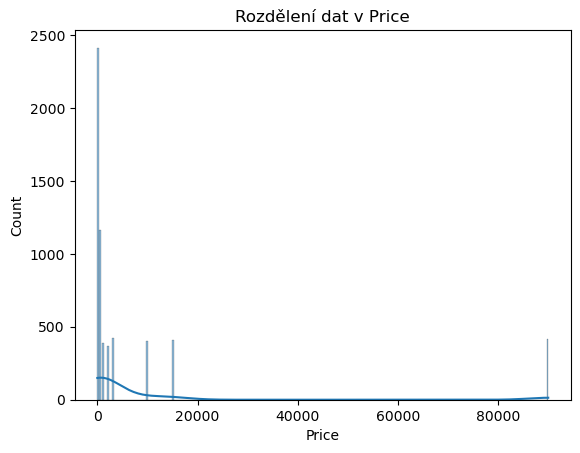

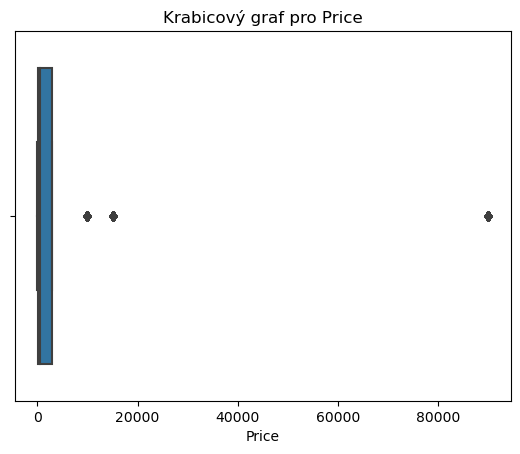

In [34]:
# Histogram
sns.histplot(orders_general['Price'], kde=True)
plt.title('Rozdělení dat v Price')
plt.show()

# Krabicový graf
sns.boxplot(x=orders_general['Price'])
plt.title('Krabicový graf pro Price')
plt.show()


In [35]:
# Protože data nejsou rovnoměrně rozdělena, používáme MinMaxScaler. Při normálním rozdělením dat by se použil StandardScaler.

##  MinMax-normalizace dat

In [36]:
#Vytvoření datového rámce
data = orders_general[['amount', 'Price']]
data 

,amount,Price
0,33,15000
1,21,15000
2,8,15000
3,50,15000
4,27,15000
...,...,...
5985,50,3000
5986,35,3000
5987,32,3000
5988,37,3000


In [37]:
# Použijime MinMaxscaler, ktery změní měřítko každého prvku v datech tak, aby jejich hodnoty byly v určeném rozsahu, obvykle od 0 do 1.
minmax_scaler = MinMaxScaler()

In [40]:
# Použijeme fit_transform, ktery provádí dvě věci současně: fit- vypočítá minimální a maximální hodnoty dat pro každý prvek (sloupec) v datech
# transform- tyto minimální a maximální hodnoty používá k škálování dat tak, aby každý prvek byl mezi 0 a 1
minmax_data = minmax_scaler.fit_transform(data)
minmax_data.shape

(5990, 2)

In [39]:
# přejmenujeme sloupce
data.rename(columns={'amount':'amount_minmax', 'Price':'Price_minmax'})

,amount_minmax,Price_minmax
0,33,15000
1,21,15000
2,8,15000
3,50,15000
4,27,15000
...,...,...
5985,50,3000
5986,35,3000
5987,32,3000
5988,37,3000


In [41]:
# Normalizujeme data
orders_general[['amount_minmax', 'Price_minmax']] = minmax_data
orders_general.head()

,order_id,product_id,amount,product_group_name,product_name,Price,product_group_name_Напитки,product_group_name_Одежда,product_group_name_Продукты,product_group_name_Часы,...,product_name_Сок,product_name_Хлеб,product_name_Часы напольные,product_name_Часы наручные,product_name_Часы настенные,product_name_Часы с кукушкой,product_name_Штаны,product_name_Юбка,amount_minmax,Price_minmax
0,52414,4,33,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653061,0.16662
1,7695,4,21,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408163,0.16662
2,22012,4,8,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.16662
3,8509,4,50,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.16662
4,82238,4,27,Одежда,Рубашка,15000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530612,0.16662


In [42]:
#Odstraňme sloupce, které byly původními sloupci pro vytváření prvků
columns_for_drop = ['product_id', 'amount', 'product_group_name', 'product_name', 'Price']
df_prepared = orders_general.drop(columns_for_drop, axis=1)
df_prepared

,order_id,product_group_name_Напитки,product_group_name_Одежда,product_group_name_Продукты,product_group_name_Часы,product_name_Вода,product_name_Злой кола,product_name_Круассан,product_name_Молоко,product_name_Носки,...,product_name_Сок,product_name_Хлеб,product_name_Часы напольные,product_name_Часы наручные,product_name_Часы настенные,product_name_Часы с кукушкой,product_name_Штаны,product_name_Юбка,amount_minmax,Price_minmax
0,52414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653061,0.16662
1,7695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408163,0.16662
2,22012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.16662
3,8509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.16662
4,82238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530612,0.16662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,98382,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.03328
5986,30026,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.693878,0.03328
5987,65083,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.632653,0.03328
5988,70542,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.734694,0.03328


In [43]:
# Spojme tabulky podle cíle order_id
order_info_and_target = pd.merge(target, df_prepared, on='order_id', how='left')
order_info_and_target

,order_id,delivery_time,product_group_name_Напитки,product_group_name_Одежда,product_group_name_Продукты,product_group_name_Часы,product_name_Вода,product_name_Злой кола,product_name_Круассан,product_name_Молоко,...,product_name_Сок,product_name_Хлеб,product_name_Часы напольные,product_name_Часы наручные,product_name_Часы настенные,product_name_Часы с кукушкой,product_name_Штаны,product_name_Юбка,amount_minmax,Price_minmax
0,99983,41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.469388,0.111062
1,99983,41,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265306,0.005500
2,99983,17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.469388,0.111062
3,99983,17,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265306,0.005500
4,99983,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.469388,0.111062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,97,45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326531,0.001056
6587,97,45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.755102,0.005500
6588,97,45,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.938776,0.000167
6589,97,45,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.005500


In [48]:
#Zobrazime počet plně vyplněných prvků a jejich procentuální podíl z celého výběru
def print_useful_rows_info(order_info_and_target):
    print('Počet plně vyplněných prvků z celeho vyběru:', len(order_info_and_target.dropna()))
    print('Procento plně obsazených prvků z celého výběru:', round(len(order_info_and_target.dropna()) / len(order_info_and_target) * 100, 2))
    
print_useful_rows_info(order_info_and_target)

Počet plně vyplněných prvků z celeho vyběru: 6591
Procento plně obsazených prvků z celého výběru: 100.0


In [45]:
#Seřaďme prvky v sestupném pořadí podle procenta chybějících hodnot
missing_values = ((order_info_and_target.isna().sum() / len(order_info_and_target)) * 100).sort_values(ascending=False)
print('Procento chybějících hodnot:\n', missing_values)

Procento chybějících hodnot:
 product_name_Огурец             4.915794
product_name_Рубашка            4.915794
amount_minmax                   4.915794
product_name_Юбка               4.915794
product_name_Штаны              4.915794
product_name_Часы с кукушкой    4.915794
product_name_Часы настенные     4.915794
product_name_Часы наручные      4.915794
product_name_Часы напольные     4.915794
product_name_Хлеб               4.915794
product_name_Сок                4.915794
Price_minmax                    4.915794
product_name_Носки              4.915794
product_name_Молоко             4.915794
product_name_Круассан           4.915794
product_name_Злой кола          4.915794
product_name_Вода               4.915794
product_group_name_Часы         4.915794
product_group_name_Продукты     4.915794
product_group_name_Одежда       4.915794
product_group_name_Напитки      4.915794
delivery_time                   0.000000
order_id                        0.000000
dtype: float64


In [46]:
# Zpracujte mezery tak, že vyplníte prázdné hodnoty nejoblíbenější hodnotou a změny uložíte
# Seznam sloupců k vyplnění prázdných míst 
columns_to_fill = [ 'product_name_Огурец', 'product_name_Рубашка', 'amount_minmax', 'product_name_Юбка', 'product_name_Штаны',
                   'product_name_Часы с кукушкой', 'product_name_Часы настенные', 'product_name_Часы наручные', 
                   'product_name_Часы напольные', 'product_name_Хлеб', 'product_name_Сок', 'Price_minmax', 
                   'product_name_Носки', 'product_name_Молоко', 'product_name_Круассан', 'product_name_Злой кола', 
                   'product_name_Вода', 'product_group_name_Часы', 'product_group_name_Продукты', 
                   'product_group_name_Одежда', 'product_group_name_Напитки']

In [47]:
# Vytvoření slovníku s nejoblíbenějšími hodnotami pro každý sloupec 
most_frequent = {column: order_info_and_target[column].mode()[0] for column in columns_to_fill}
# Doplňte prázdná místa pomocí slovníku 
order_info_and_target.fillna(value=most_frequent, inplace=True)

In [49]:
#Zobrazime počet plně vyplněných prvků a jejich procentuální podíl z celého výběru
def print_useful_rows_info(order_info_and_target):
    print('Počet plně vyplněných prvků z celeho vyběru:', len(order_info_and_target.dropna()))
    print('Procento plně obsazených prvků z celého výběru:', round(len(order_info_and_target.dropna()) / len(order_info_and_target) * 100, 2))
    
print_useful_rows_info(order_info_and_target)

Počet plně vyplněných prvků z celeho vyběru: 6591
Procento plně obsazených prvků z celého výběru: 100.0


## Prognostické algoritmy

### Lineární model 

In [50]:
df_lin = order_info_and_target.copy()
# Rozdělení dat na funkce a cílovou proměnnou 
X = df_lin.drop(['delivery_time', 'order_id'], axis=1) 
y = df_lin['delivery_time']

In [51]:
y.head()

0    41
1    41
2    17
3    17
4    28
Name: delivery_time, dtype: int32

In [52]:
X.head()

,product_group_name_Напитки,product_group_name_Одежда,product_group_name_Продукты,product_group_name_Часы,product_name_Вода,product_name_Злой кола,product_name_Круассан,product_name_Молоко,product_name_Носки,product_name_Огурец,...,product_name_Сок,product_name_Хлеб,product_name_Часы напольные,product_name_Часы наручные,product_name_Часы настенные,product_name_Часы с кукушкой,product_name_Штаны,product_name_Юбка,amount_minmax,Price_minmax
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.469388,0.111062
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265306,0.005500
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.469388,0.111062
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265306,0.005500
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.469388,0.111062


In [53]:
# Použijeme MinMaxScaler, ktery se používá k normalizaci dat. 
# Změní měřítko každého prvku v datech tak, aby jejich hodnoty byly v určeném rozsahu, obvykle od 0 do 1. 
mmsc = MinMaxScaler()
X_mmsc = mmsc.fit_transform(X)

In [54]:
# Vytvoření a trénování lineárního regresního modelu 
model = LinearRegression() 
model.fit(X_mmsc, y)

LinearRegression()

In [56]:
# Predikce (předpověď) na zkušebním vzorku 
y_pred = model.predict(X_mmsc)

In [57]:
# Vyhodnocení modelu 
mаe = mean_absolute_error(y_pred, y)
print(f"Mean Absolute Error: {mаe}")

Mean Absolute Error: 14.997194920156273


In [59]:
# Použití křížového ověřování
Y_pred = cross_val_predict(model, X, y)
mаe = mean_absolute_error(Y_pred, y)
print(f"Mean Absolute Error: {mаe}")

Mean Absolute Error: 15.047758403089913


### Klasický rozhodovací strom

In [60]:
df_tree = order_info_and_target.copy()
# Rozdělení dat na funkce a cílovou proměnnou 
X = df_tree.drop(['delivery_time', 'order_id'], axis=1) 
y = df_tree['delivery_time']

In [62]:
# Vytvoření a trénování modelu  
dt_r = DecisionTreeRegressor()
dt_r.fit(X, y)
y_pred = dt_r.predict(X)

In [63]:
# Vyhodnocení modelu s použitim MAE
mаe = mean_absolute_error(y_pred, y)
print(f"Mean Absolute Error: {mаe}")

Mean Absolute Error: 13.833331146261626


In [64]:
# Použití křížového ověřování
Y_pred = cross_val_predict(dt_r, X, y)

In [67]:
# Vyhodnocení modelu s použitim MSE 
mse = mean_squared_error(Y_pred, y, squared=False)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 19.068505883310937


In [68]:
# Změnime maximální hloubky stromu, což může pomoci zabránit přeučení modelu (nastaveni hyperparametru)
dt_r = DecisionTreeRegressor(max_depth=5)
Y_pred = cross_val_predict(dt_r, X, y)

In [61]:
# Vyhodnocení modelu 
mаe = mean_absolute_error(Y_pred, y)
print(f"Mean Absolute Error: {mаe}")

Mean Absolute Error: 15.047758403089913


### Náhodný les

In [69]:
df_rf = order_info_and_target.copy()
# Rozdělení dat na funkce a cílovou proměnnou
X = df_rf.drop(['delivery_time', 'order_id'], axis=1) 
y = df_rf['delivery_time']

In [70]:
# Vytvoření a trénování modelu
rf_r = RandomForestRegressor()
rf_r.fit(X, y)
y_pred = rf_r.predict(X)

In [71]:
# Vyhodnocení modelu 
mаe = mean_absolute_error(y_pred, y)
print(f"Mean Absolute Error: {mаe}")

Mean Absolute Error: 13.852461373449279


In [72]:
# Použití křížového ověřování
Y_pred = cross_val_predict(rf_r, X, y)

In [73]:
# Vyhodnocení modelu 
mаe = mean_absolute_error(Y_pred, y)
print(f"Mean Absolute Error: {mаe}")

Mean Absolute Error: 15.837408540051493


In [74]:
# Změnime maximální hloubky stromu
rf_r = DecisionTreeRegressor(max_depth=5)
Y_pred = cross_val_predict(rf_r, X, y)

In [75]:
# Vyhodnocení modelu  
mаe = mean_absolute_error(Y_pred, y)
print(f"Mean Absolute Error: {mаe}")

Mean Absolute Error: 15.10405907412799


## Vysledek

In [76]:
# Data byla zpracována vyplněním NEJČASTĚJI se vyskytující hodnotou
# Jelikož cílová proměnná je číselná a kontinuální, jedná se o úlohu regrese..
# Pro tento úkol byla použita metrika MAE (je méně citlivá na odlehlé hodnoty)
# Nejlepším algoritmem z hlediska vybrané metriky na křížové validaci se ukázala být - lineární regrese (15.03)